In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
Y = heart_disease.data.targets 


In [3]:
import pandas as pd


data = pd.concat([X, Y], axis=1)

# Now 'data' contains both features and target variable joined together
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [4]:
data = data.dropna()

In [5]:
X = data.drop(['num'],axis = 'columns')

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame and you want to normalize all columns
scaler = MinMaxScaler()  # Create a MinMaxScaler object

# Fit the scaler to your data and transform it
normalized_data = scaler.fit_transform(X)



In [7]:
x = normalized_data

In [8]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'num' is the column containing values from 0 to 4
data['num'] = data['num'].replace([1, 2, 3, 4], 1)

# Verify the changes
print(data['num'].unique())  # Check unique values after replacement


[0 1]


In [9]:
y = data['num']

#### This data contains 14 health attributes of 303 patients. The goal is to detect the presence of heart disease in a patient. 
The response is integer-valued, varying from 0 to 4. ‘0’ denotes the absence of heart disease,
while there are 4 different types of heart diseases 1, 2, 3, and 4. We consider (1, 2, 3, 4) as ‘1’ which denotes
the presence of heart disease in a patient.

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', gamma=0.5, C=0.1)


svm_classifier.fit(x_train, y_train)

svm_classifier.score(x_test,y_test)

0.8

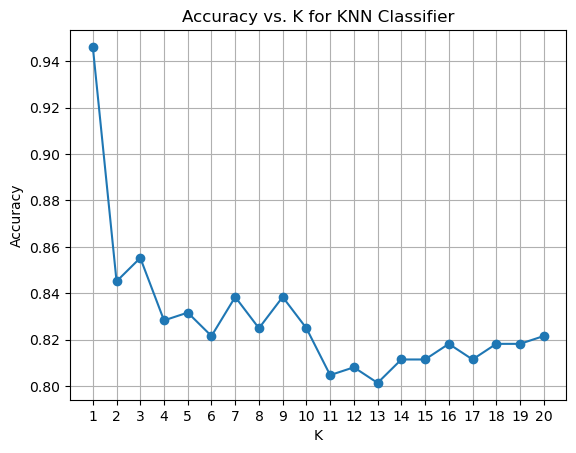

In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



# Define range of K values to try
k_values = range(1, 21)  # Adjust the range as needed

# Initialize lists to store accuracy scores for different K values
accuracy_scores = []

# Iterate over different K values
for k in k_values:
    # Initialize KNN classifier with current value of K
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on training data
    knn_classifier.fit(x_train, y_train)
    
    # Evaluate accuracy on validation data
    accuracy = knn_classifier.score(x, y)
    
    # Append accuracy score to the list
    accuracy_scores.append(accuracy)

# Plot K values vs. accuracy scores
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for KNN Classifier')
plt.xticks(k_values)
plt.grid(True)
plt.show()


From the graph We can see the optimum value for k. which is 3 and 4 in our case

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(x_train, y_train)

knn_classifier.score(x_test,y_test)

0.8

In [14]:
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

kde_classes = []
for class_label in np.unique(y_train):
    X_class = x_train[y_train == class_label]
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2)  # You can adjust bandwidth
    kde.fit(X_class)
    kde_classes.append(kde)
    
# Classify test data
predicted_labels = []
for sample in x_test:  # Iterate over rows of x_test directly
    class_scores = []
    for kde in kde_classes:
        class_scores.append(np.exp(kde.score([sample])))
    predicted_label = np.argmax(class_scores)
    predicted_labels.append(predicted_label)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)


Accuracy: 0.7866666666666666
